In [1]:
import seaborn as sns
import pandas as pd
import sklearn as sk
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('funda_amsterdam.csv')
df.head()

# df = df.dropna() # We can get rif of rows

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [3]:
df_subset = df[['price', 'area', 'bedrooms']]
df_subset.head()

,price,area,bedrooms
0,510000,108,2
1,215000,47,1
2,325000,116,2
3,315000,58,2
4,200000,63,1


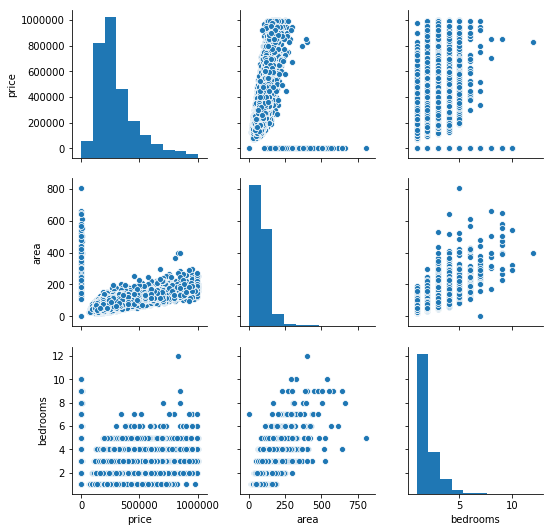

In [4]:
sns.pairplot(df_subset)
plt.show()

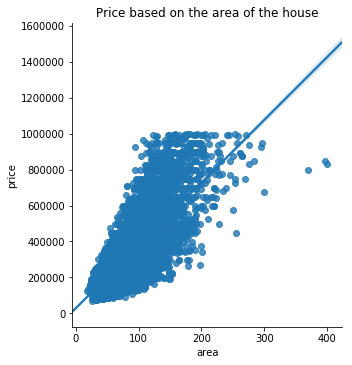

In [5]:
df_sub_subset = df_subset[df_subset['price'] > 30000] # df = df[(df['price'] >30000]) & (df[['area'>10]])

sns.lmplot(x='area', y='price', fit_reg=True, data=df_sub_subset) #fit_reg=True shows the regression line
plt.xlabel('area') #use matplotlib to refine Seaborn plot
plt.ylabel('price')
plt.title('Price based on the area of the house')
plt.show()

There is a correlation is lineair, which means that the area influences the price of the house.

In [6]:
pearsonr(df_sub_subset['area'],df_sub_subset['price']) # We will need the correlation function from the scientific package scipy

(0.7250807666953685, 0.0)

The correlation value is strong, the p-value is significant.

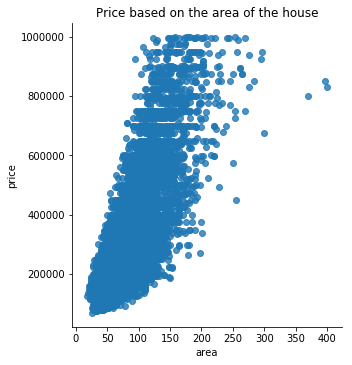

In [7]:
df_sub_subset = df_subset[df_subset['price'] > 30000] # df = df[(df['price'] >30000]) & (df[['area'>10]])

sns.lmplot(x='area', y='price', fit_reg=False, data=df_sub_subset) #fit_reg=True shows the regression line
plt.xlabel('area') #use matplotlib to refine Seaborn plot
plt.ylabel('price')
plt.title('Price based on the area of the house')
plt.show()

In [8]:
#To use sk-learn, we need to create lists of the two variables
#Tote that you need to use [[]] with x, because x could be multiple variables (each variable is a list)
x = df_sub_subset[['area']] # The X can have multiple X, the functions expect a list within a list, you have to combine them in a list of lists
y = df_sub_subset['price'] # One dependent vriable, one target, so no necesary to have doudble brackets
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.intercept_ #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3498.81 + 27983.93X


Markdown formula

Y = 416.79 + 45.78X

Where y is price and x is area

In [9]:
df_sub_subset['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df_sub_subset.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,price,area,bedrooms,price_p
0,510000,108,2,405855.880756
1,215000,47,1,192428.204791
2,325000,116,2,433846.395637
3,315000,58,2,230915.162752
4,200000,63,1,248409.234552
5,515000,125,2,465335.724877
6,200000,64,3,251908.048913
7,599000,155,3,570300.155680
8,249000,85,2,325383.150474
9,300000,67,2,262404.491993


The price_p column is the prediction column, where we can see the predictions for the price of the houses.

In [10]:
# Calculating residuals (e)
x = df_sub_subset[['area']] #get the area
y = df_sub_subset['price'] #get the price
lm = LinearRegression() #create a new (empty model)
lm.fit(x, y) #fit the model

df_sub_subset['price_pre'] = lm.predict(x) #generate the predictions and add them to the dataframe
df_sub_subset['resid'] = df_sub_subset['price_pre'] - df_sub_subset['price'] #get the residuals by subtracting the prediction from the actual price

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


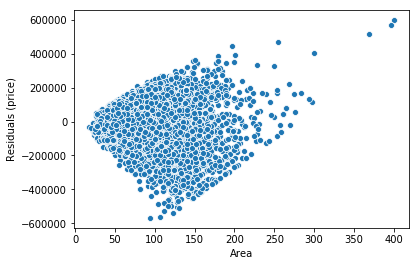

In [11]:
# Making plot for (X, e)
sns.scatterplot(x='area',y='resid',data=df_sub_subset)
plt.xlabel('Area')
plt.ylabel('Residuals (price)')
plt.show()

The residuals show that the prediction is not correct (the bigger the area, the bigger the errors on the predictions; positively and negatively). The predicted price is way too far from the actual price.

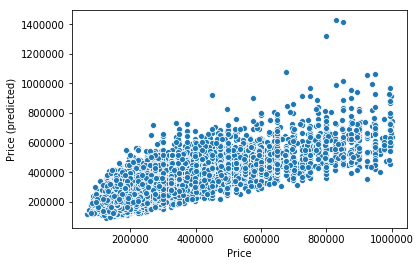

In [12]:
#Making plot for (Y, Y1) 
sns.scatterplot(x='price',y='price_pre',data=df_sub_subset)
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

The more expensive the houses, the more errors you get in the predicted prices.

In [13]:
# Applying R model
r2_score(df_sub_subset['price'], df_sub_subset['price_pre']) #this gives the model fit (R2) for the Y and predicted Y

0.5257421182315432

The R^2 is 0.52, which means 52% of the variation in views is explained by the model. That's good.

In [14]:
# Calcularing mean squared error
math.sqrt(mean_squared_error(df_sub_subset['price'], df_sub_subset['price_pre'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022

The RMSE is 118 thousand. Which means that we are about 118 thousand (euro's) off in our predicted price. This is the average of all the errors/residuals. Since we only had the area of teh houses, this is not a 'too bad' prediction.

The bigger the houses, the bigger the error in predictions. Conclusion: The cheap houses are predicted to expensive, the expensive houses are predicted too cheap. In this case the fit for the houses in the middle are predicted the best.

In [15]:
df_funda = df[['area', 'property_type', 'rooms', 'price']]
df_funda.head()

,area,property_type,rooms,price
0,108,apartment,3,510000
1,47,apartment,2,215000
2,116,apartment,3,325000
3,58,apartment,3,315000
4,63,apartment,3,200000


In [16]:
prop_type = pd.get_dummies(df_funda['property_type'])
df_funda = pd.concat([df_funda, prop_type], axis=1)
df_funda.head()

,area,property_type,rooms,price,apartment,house
0,108,apartment,3,510000,1,0
1,47,apartment,2,215000,1,0
2,116,apartment,3,325000,1,0
3,58,apartment,3,315000,1,0
4,63,apartment,3,200000,1,0


In [38]:
y = df_funda['price'] #We need to take out the rating as our Y-variable
X = df_funda[['area', 'rooms', 'apartment', 'house']] # this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.head()
# 3 indepents (X) and 1 dependent (Y) = price

,area,rooms,apartment,house
0,108,3,1,0
1,47,2,1,0
2,116,3,1,0
3,58,3,1,0
4,63,3,1,0


In [39]:
# Creating training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

,area,rooms,apartment,house
1041,138,4,1,0
5355,57,3,1,0
1383,104,2,1,0
7950,71,3,1,0
4451,88,4,1,0


In [40]:
lm = LinearRegression() #creating the linear model
model = lm.fit(X_train, y_train) #training the model, based on the training set

In [41]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
732.513832,area
17203.336809,rooms
18802.251720,apartment
-18802.251720,house


If the area is negative (x1), this means the area has a negative impact on the price(X)

Y(price) = b0 + b1 area (x1)

Negative coeficient: it has a negative impact on the price.

*Remember that we are always looking at the performance on the test data:* 

In [42]:
y_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_p)

0.12342574562043929

*Prediction for the test data set:*

The R^2 is 0.12, which means 12% of the variation of the price is explained by the model. 
Explanation: How much i can explain of the variation

In [43]:
math.sqrt(mean_squared_error(y_test, y_p))

171175.26797475255

*Compare the training data set results vs the test data set results:*

The RMSE is 117 duizend euro. Which means that we are typically about 117 duizend eurp off in our predicted price.

Explanation: How much is my typical prediction off? (some predicts are good, the predicts that are in the middle)

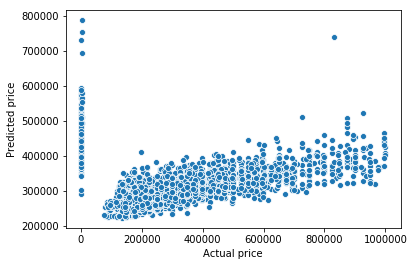

In [44]:
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()